In [3]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.0.0


In [29]:
num_epochs = 100
total_series_length  = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length


In [30]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [31]:
x,y = generateData()
print('this is x:')
print(x.shape)
print('this is y:')
print(y.shape)

this is x:
(5, 10000)
this is y:
(5, 10000)


In [32]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)


In [33]:
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [34]:
print(init_state)
for i in inputs_series:
    print(i)

Tensor("Placeholder_5:0", shape=(5, 4), dtype=float32)
Tensor("unstack_2:0", shape=(5,), dtype=float32)
Tensor("unstack_2:1", shape=(5,), dtype=float32)
Tensor("unstack_2:2", shape=(5,), dtype=float32)
Tensor("unstack_2:3", shape=(5,), dtype=float32)
Tensor("unstack_2:4", shape=(5,), dtype=float32)
Tensor("unstack_2:5", shape=(5,), dtype=float32)
Tensor("unstack_2:6", shape=(5,), dtype=float32)
Tensor("unstack_2:7", shape=(5,), dtype=float32)
Tensor("unstack_2:8", shape=(5,), dtype=float32)
Tensor("unstack_2:9", shape=(5,), dtype=float32)
Tensor("unstack_2:10", shape=(5,), dtype=float32)
Tensor("unstack_2:11", shape=(5,), dtype=float32)
Tensor("unstack_2:12", shape=(5,), dtype=float32)
Tensor("unstack_2:13", shape=(5,), dtype=float32)
Tensor("unstack_2:14", shape=(5,), dtype=float32)


In [35]:
current_state = init_state
states_series = []
for current_input in inputs_series: 
    #print(current_input)
    current_input = tf.reshape(current_input, [batch_size,1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1)
    
    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W)+b)
    #print(next_state)
    states_series.append(next_state)
    current_state = next_state
    
    

In [36]:
#print(states_series)

In [37]:
logits_series = [tf.matmul(state, W2)+b2 for state in states_series]
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

#print(type(logits_series))
#print(type(labels_series))
#print(type(zip(logits_series, labels_series)))
#for i in zip(logits_series, labels_series):
 #   print(i)
#zip takes the two lists and makes tuples at each index
#this zip makes a bunch of tuples of tensors that are in logits and labels series
    
losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=labels) for logits,labels in zip(logits_series, labels_series)]      
    
#the logits = logits and labels = labels comes from the for loop in the list
#comprehension on the line above 

total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)


In [47]:
'''def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2,3,1)
    plt.cla()
    plt.plot(loss_list)
    
    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])    
        plt.subplot(2,3, batch_series_idx +2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length) 
        plt.bar(left_offset, batchX[batch_series_idx, :], width = 1, color = 'blue')
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width = 1, color = 'red')
        plt.bar(left_offset, single_output_series * 0.3, width = 1, color = 'greeen')
        
        
    plt.draw()
    plt.pause(0.0001)
    '''
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)


New data, epoch 0
Step 0 Loss 0.695852
Step 100 Loss 0.700539
Step 200 Loss 0.73129
Step 300 Loss 0.691167
Step 400 Loss 0.697235
Step 500 Loss 0.694921
Step 600 Loss 0.691318
New data, epoch 1
Step 0 Loss 0.704151
Step 100 Loss 0.696035
Step 200 Loss 0.695234
Step 300 Loss 0.689879
Step 400 Loss 0.611907
Step 500 Loss 0.119075
Step 600 Loss 0.0260856
New data, epoch 2
Step 0 Loss 0.18221
Step 100 Loss 0.009095
Step 200 Loss 0.00624204
Step 300 Loss 0.00451931
Step 400 Loss 0.00370049
Step 500 Loss 0.00308849
Step 600 Loss 0.00251373
New data, epoch 3
Step 0 Loss 0.189032
Step 100 Loss 0.00256
Step 200 Loss 0.00190524
Step 300 Loss 0.00176416
Step 400 Loss 0.00173824
Step 500 Loss 0.00147863
Step 600 Loss 0.00144714
New data, epoch 4
Step 0 Loss 0.182415
Step 100 Loss 0.00128079
Step 200 Loss 0.00130863
Step 300 Loss 0.00124915
Step 400 Loss 0.0012065
Step 500 Loss 0.00118186


KeyboardInterrupt: 

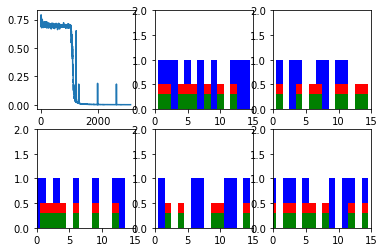

In [51]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()

In [39]:
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []
    
    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))
        
        print("New data, epoch", epoch_idx)
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length
            
            batchX = x[:, start_idx:end_idx]
            batchY = y[: start_idx: end_idx]
            
            _totoal_loss, _train_step, _current_state, _predictions_series = sess.run([total_loss, train_step, current_state, predictions_series],
                                                                                      feed_dict = {
                                                                                          batchX_placeholder:batchX,
                                                                                          batchY_placeholder:batchY,
                                                                                          init_state:current_state
                                                                                      })
            loss_list.append(_total_loss)
            
            if batch_idx%100 ==0:
                print("Step", batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)
                
plot.ioff()
plt.show()
    

New data, epoch 0


ValueError: Cannot feed value of shape (0, 10000) for Tensor 'Placeholder_4:0', which has shape '(5, 15)'